<a href="https://colab.research.google.com/github/SokichiFujita/PyTorch-for-Deep-Learning-and-Computer-Vision/blob/master/Chapter5_Perceptrons.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt 
import numpy as np
from sklearn import datasets

(100, 2) [[ 7.55780450e+00 -9.99193610e+00]
 [ 1.09042326e+01 -7.46946424e+00]
 [ 2.31591956e+00 -4.78133164e+00]
 [-1.11105264e+01 -6.48117924e+00]
 [ 7.63923344e+00 -4.97175603e+00]
 [-3.56558174e+00 -1.22940034e+00]
 [ 1.27531040e+01  4.46993105e+00]
 [ 2.90690623e+00 -1.54715697e+01]
 [-7.02945017e+00  1.58620781e+00]
 [ 9.89494222e+00 -6.83282129e+00]
 [-6.56611498e+00 -1.18213690e+00]
 [-6.82801779e+00  1.54510333e-01]
 [ 8.57819991e+00 -8.66602549e+00]
 [-1.24695758e+00 -8.43236614e+00]
 [-8.40383875e+00  3.03129134e+00]
 [ 6.49760247e+00 -1.21887650e+01]
 [-1.08613896e+00 -6.82821931e+00]
 [-4.44770502e+00  2.16119680e+00]
 [-2.64973046e+00 -1.36612594e+00]
 [ 8.95033321e+00 -7.03268924e+00]
 [ 7.07917640e-01 -1.11878913e+01]
 [-6.42164605e+00  1.59952631e+00]
 [ 6.12491566e-01 -3.89705069e-01]
 [ 1.22778372e+01 -3.61944838e+00]
 [ 2.37467444e+00 -7.07388767e+00]
 [-4.56301769e+00 -1.18304937e-01]
 [-8.48871977e+00  2.31304169e+00]
 [ 7.84432774e+00  4.67536005e+00]
 [ 4.653524

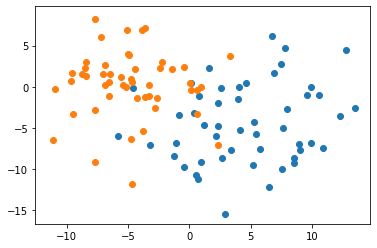

In [165]:
number_points = 100
X, y = datasets.make_blobs(n_samples=number_points, n_features=2, random_state=123, centers=2, cluster_std=4) # API has been changed
print(X.shape, X)
print(y.shape, y)

def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0,1])
  plt.scatter(X[y==1, 0], X[y==1,1])

scatter_plot()

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

In [0]:
class Model(nn.Module):
  def __init__(self,input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = torch.sigmoid(self.linear(x))
    return pred

In [167]:
torch.manual_seed(2)
model = Model(2,1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [0]:
[w, b] = model.parameters()
w1, w2 = w.view(2)

def get_params():
  return (w1.item(), w2.item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-10,10, -10,10])
  x2 = (w1 * x1 + b1) / -w2
  plt.plot(x1,x2,'r')
  scatter_plot()

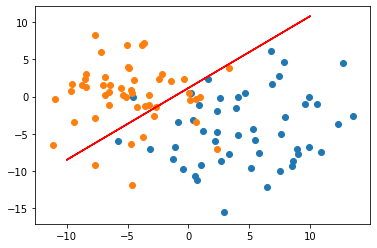

In [170]:
plot_fit("Initial Model")

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [0]:
epochs = 1000
losses = []

for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  #print("epoch:", i, "loss:", loss.item())
  
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Text(0.5, 0, 'epoch')

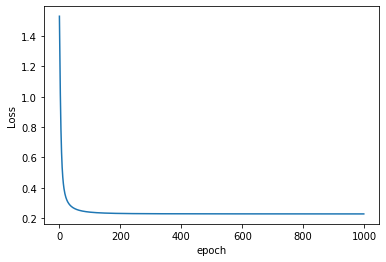

In [173]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

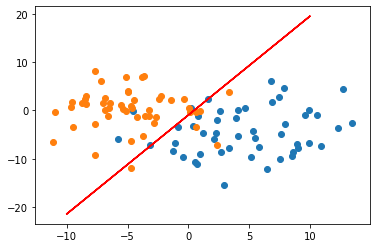

In [174]:
plot_fit("Trained Model")